In [122]:
%matplotlib inline

# Phishing Website Classification - CS4403 Project

I will be using the PhiUSIIL Phishing URL (Website) dataset from https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset. <br> Size: 235795 Rows, 56 Columns <br> Legimate: 1348550, Phishing: 100945 <br> <br> Insights: <br>
- What are the most important features to determining if a website is legitimate or not
- Can I build a model using some of these features to accurately predict whether a website is phishing or not
- Gain more skills in feature selection <br>

Proposed Use:
- Understand how phishing websites can be detected
- Use this model to build a program that can detect phishing websites in real time <br>

Importance & Expected Learnings: <br>
- Phishing remains one of the biggest risks to individuals and organizations alike, the ability to accurately detect these websites would be extremely valuable. Even knowing the telling factors to a phishing website would be valuable

## Importing Dataset

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Read dataset
data = pd.read_csv('data/PhiUSIIL_Phishing_URL_Dataset.csv')

# Create datafra
df = pd.DataFrame(data)

## Data Exploration

### General Inspection and Information

In [209]:
# Shape (numRows, numColumns) of dataset
df.shape

(235795, 56)

In [210]:
print(df['label'].value_counts())

label
1    134850
0    100945
Name: count, dtype: int64


In [211]:
# Print first few rows of dataset
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [212]:
# Check for any missing values in each column
df.isnull().sum() # NO MISSING VALUES

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

In [213]:
# Get basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [214]:
# Count of unique values in each column
df.nunique()

FILENAME                      235795
URL                           235370
URLLength                        482
Domain                        220086
DomainLength                     101
IsDomainIP                         2
TLD                              695
URLSimilarityIndex             36360
CharContinuationRate             898
TLDLegitimateProb                465
URLCharProb                   227421
TLDLength                         12
NoOfSubDomain                     10
HasObfuscation                     2
NoOfObfuscatedChar                20
ObfuscationRatio                 146
NoOfLettersInURL                 421
LetterRatioInURL                 709
NoOfDegitsInURL                  182
DegitRatioInURL                  575
NoOfEqualsInURL                   25
NoOfQMarkInURL                     5
NoOfAmpersandInURL                31
NoOfOtherSpecialCharsInURL        74
SpacialCharRatioInURL            240
IsHTTPS                            2
LineOfCode                     10738
L

In [215]:
# Check for duplicate instances
df.duplicated().sum() # NO DUPLICATES

0

### Analyzing Numerical & Categorical Data

In [216]:
# Summary statistics for numerical columns
df.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


Key Points:
- IsDomainIP: Low mean -> only a small fraction of URLs have IP addresses instead of domain names
- NoOfImage: High std -> some websites have an unusually high # of images
- NoOfExternalRef: Mean of 49 but std of 161 -> Some URLs link out to a large # of external sites
- NoOfCSS and NoOfJS have high variability
- TLDLegitmateProb: Mean of 0.26 with a max of 0.5, odd considering that 57% of the data is legitimate

In [217]:
# Get value counts for categorical features
for col in df.select_dtypes(include=["object"]).columns:
    print(f"\nValue Counts for {col}:")
    print(df[col].value_counts())


Value Counts for FILENAME:
FILENAME
521848.txt      1
96605.txt       1
oph08639.txt    1
8024072.txt     1
8014599.txt     1
               ..
611368.txt      1
786974.txt      1
8008024.txt     1
702558.txt      1
384822.txt      1
Name: count, Length: 235795, dtype: int64

Value Counts for URL:
URL
https://disclosepack.myportfolio.com/                                                         2
https://barlandas.com/reprisedefunction/unzupdm/                                              2
http://app-batasotak1244acces.kvoiffugw9-yk26ed5vg379.p.temp-site.link/termsofservice.html    2
https://fleek.ipfs.io/ipfs/qmzt2xz7uq7tdgiirmv7u7zaabtfhjn8jzouurbptgtgal/                    2
https://sucursalvirtualpersona.la-empresaempre.repl.co/                                       2
                                                                                             ..
https://www.clothdiaperkids.com                                                               1
https://www.toucansoluti

Key Points:
- FILENAME: Unique ID, will be dropped
- URL: Only 235370 unique URLs out of 235795
- Domain: A lot of duplicate domains
- TLD: A lot of common TLDs
- Title: A lot of missing titles

TLD column has 695 unique values, I need to encode it. Will either use target or frequency encoding.

### YData-Profiling for Efficient EDA (Pre-Cleaning)

Since I currently have 52 features, I will be using pandas/y-data profiling which will enable me to conduct EDA efficiently.

In [221]:
from ydata_profiling import ProfileReport

# Takes a while to generate

# Using ydata_profiling for automated EDA
profile = ProfileReport(df, title="Phishing URL Exploratory Data Analysis", explorative=True)

profile.to_file("Phishing_URL_EDA_Report (Pre-Cleaning).html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Cleaning & Preprocessing

### Dropping Irrelevant Columns

In [134]:
# Drop irrelevant columns
df.drop(['FILENAME', 'URL', 'Domain', 'Title'], axis=1, inplace=True)
# FILENAME is a unique ID
# URL, Domain, and Title will not be used specifically. Just the features that have been extracted from them

### Encoding

In [135]:
# Encoding TLD
# Trying Frequency Encoding first but may switch to target encoding
frequency_map = df['TLD'].value_counts().to_dict()
df['TLD'] = df['TLD'].map(frequency_map)

df.head()

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,31,24,0,112554,100.0,1.000000,0.522907,0.061933,3,1,...,0,0,1,34,20,28,119,0,124,1
1,23,16,0,3996,100.0,0.666667,0.032650,0.050207,2,1,...,0,0,1,50,9,8,39,0,217,1
2,29,22,0,6395,100.0,0.866667,0.028555,0.064129,2,2,...,0,0,1,10,2,7,42,2,5,1
3,26,19,0,112554,100.0,1.000000,0.522907,0.057606,3,1,...,1,1,1,3,27,15,22,1,31,1
4,33,26,0,18793,100.0,1.000000,0.079963,0.059441,3,1,...,1,0,1,244,15,34,72,1,85,1


### Double Check for Duplicates or Missing Values

In [136]:
# Check for duplicate instances
df.duplicated().sum() # NO DUPLICATES

808

In [137]:
df = df.drop_duplicates()

## Feature Reduction

### Highly Correlated Features

In [138]:
# Compute correlation matrix
corr_matrix = df.corr(method='pearson').abs()  # Take absolute value for easier analysis

# Select upper triangle of the correlation matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find feature pairs with correlation above 0.85 (adjust as needed)
high_corr_pairs = [(column, index, upper_tri.loc[index, column])
                   for column in upper_tri.columns for index in upper_tri.index
                   if pd.notna(upper_tri.loc[index, column]) and upper_tri.loc[index, column] > 0.85]

# Convert to DataFrame for readability
high_corr_df = pd.DataFrame(high_corr_pairs, columns=["Feature 1", "Feature 2", "Correlation"])
print(high_corr_df)

            Feature 1              Feature 2  Correlation
0   TLDLegitimateProb                    TLD     0.999688
1    NoOfLettersInURL              URLLength     0.956044
2  URLTitleMatchScore  DomainTitleMatchScore     0.960911
3               label     URLSimilarityIndex     0.859856


- TLDLegitimateProb and TLD have an extremely high correlation
- NoOfLettersInURL and URLLength also have a very high correlation -> Indicating a lot of URLs are made up mostly of letters
- URLTitleMatchScore and DomainTitleMatch score also have a high correlation
- label and URLSimilarityIndex have a high correlation -> Indicating that URLSimilarityIndex is a key metric for detecting phishing websites

In [139]:
# Dropping highly correlated features
df = df.drop(['TLD', 'NoOfLettersInURL', 'URLTitleMatchScore'], axis=1)

### Low Variance Features

In [140]:
from sklearn.feature_selection import VarianceThreshold

X = df.drop(columns = 'label')
y = df['label']

# Initialize threshold
selector = VarianceThreshold(threshold=0.01)
selector.fit(X)

# Apply transformation
X_var_filtered = X.loc[:, selector.get_support()]

# Print removed features
removed_features = X.columns[~selector.get_support()]
print("Low Variance Features Removed:", list(removed_features))

df = df.drop(removed_features, axis=1)

Low Variance Features Removed: ['IsDomainIP', 'URLCharProb', 'HasObfuscation', 'ObfuscationRatio', 'DegitRatioInURL', 'SpacialCharRatioInURL']


In [141]:
df.shape

(234987, 43)

## Saving DF for Future Models

In [142]:
# URLSimilarityIndex
df_sim = df.copy()
# NoURLSimilarityIndex
df_nosim = df.drop(columns = 'URLSimilarityIndex').copy()
# Combined
df_for_final = df.copy()

## Feature Selection Using L1 Regularization (With URLSimilarityIndex)

### Scaling

In [143]:
from sklearn.preprocessing import StandardScaler

X = df_sim.drop(columns = 'label')
y = df_sim['label']

# Initialize Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Manual Tradeoff Exploration

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import numpy as np

results = []

# # MARKDOWN BELOW IS THE RESULTS - UNCOMMENT TO RUN BUT IT TAKES A WHILE # # # 

# Manually look at performance of each C value

for C in [1.0, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]:
    model = LogisticRegression(penalty='l1', solver='saga', C=C, max_iter=5000, random_state=42, n_jobs=-1)
    model.fit(X_scaled, y)

    y_pred = model.predict(X_scaled)
    f1 = f1_score(y, y_pred)
    num_features = np.sum(model.coef_[0] != 0)

    print(f"C={C:<6} F1 Score: {f1:.4f} | Features kept: {num_features}")
    results.append((C, f1, num_features))

# Show results
# for C, f1, n in results:
#     print(f"C={C:<6}  F1 Score: {f1:.4f} | Features kept: {n}")

C=1.0    F1 Score: 0.9998 | Features kept: 42
C=0.5    F1 Score: 0.9998 | Features kept: 41
C=0.1    F1 Score: 0.9998 | Features kept: 37
C=0.05   F1 Score: 0.9998 | Features kept: 31
C=0.01   F1 Score: 0.9997 | Features kept: 20
C=0.005  F1 Score: 0.9996 | Features kept: 17
C=0.001  F1 Score: 0.9990 | Features kept: 9
C=0.0005 F1 Score: 0.9989 | Features kept: 7
C=0.0001 F1 Score: 0.9983 | Features kept: 5


- C=1.0     F1 Score: 0.9998 | Features kept: 42
- C=0.5     F1 Score: 0.9998 | Features kept: 41
- C=0.1     F1 Score: 0.9998 | Features kept: 37
- C=0.05    F1 Score: 0.9998 | Features kept: 31
- C=0.01    F1 Score: 0.9997 | Features kept: 20
- C=0.005   F1 Score: 0.9996 | Features kept: 17
- C=0.001   F1 Score: 0.9990 | Features kept: 9
- C=0.0005  F1 Score: 0.9989 | Features kept: 7
- C=0.0001  F1 Score: 0.9983 | Features kept: 5

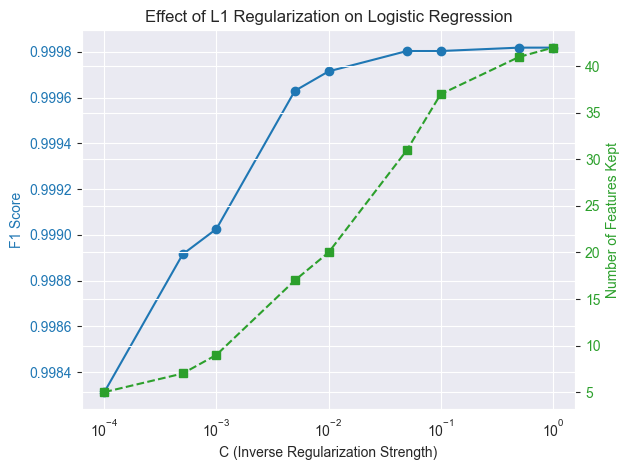

In [145]:
# Sort results by C value ascending
results.sort(key=lambda x: x[0])

C_vals, f1_scores, num_features = zip(*results)

fig, ax1 = plt.subplots()

# F1 Score line
ax1.plot(C_vals, f1_scores, marker='o', label='F1 Score', color='tab:blue')
ax1.set_xscale('log')
ax1.set_xlabel('C (Inverse Regularization Strength)')
ax1.set_ylabel('F1 Score', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Features kept line
ax2 = ax1.twinx()
ax2.plot(C_vals, num_features, marker='s', label='Number of Features Kept', color='tab:green', linestyle='--')
ax2.set_ylabel('Number of Features Kept', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Title
plt.title('Effect of L1 Regularization on Logistic Regression')

fig.tight_layout()
plt.show()

In [146]:
from sklearn.linear_model import LogisticRegression

# Re-train model at chosen C
model = LogisticRegression(penalty='l1', solver='saga', C=0.0001, max_iter=5000, random_state=42)
model.fit(X_scaled, y)

# Extract selected features
selected_mask = model.coef_[0] != 0
selected_features = X.columns[selected_mask]

print("Final selected features:")
print(selected_features.tolist())

Final selected features:
['URLSimilarityIndex', 'IsHTTPS', 'HasDescription', 'HasSocialNet', 'HasCopyrightInfo']


### Feature Analysis

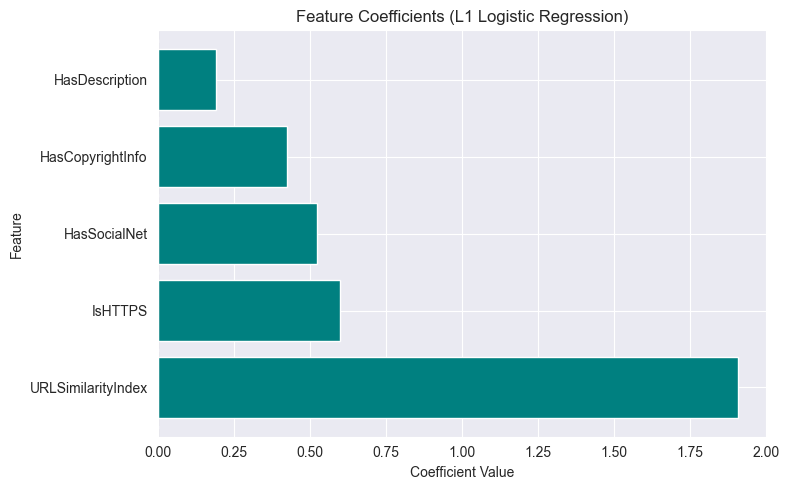

In [147]:
# Get coefficients
coefs = model.coef_[0]
selected_coefs = coefs[selected_mask]

# Build dataframe for easy plotting
coef_df = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': selected_coefs
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Plot
plt.figure(figsize=(8, 5))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='teal')
plt.axvline(0, color='gray', linestyle='--')
plt.title('Feature Coefficients (L1 Logistic Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

- Similarity Index is by far the most powerful feature

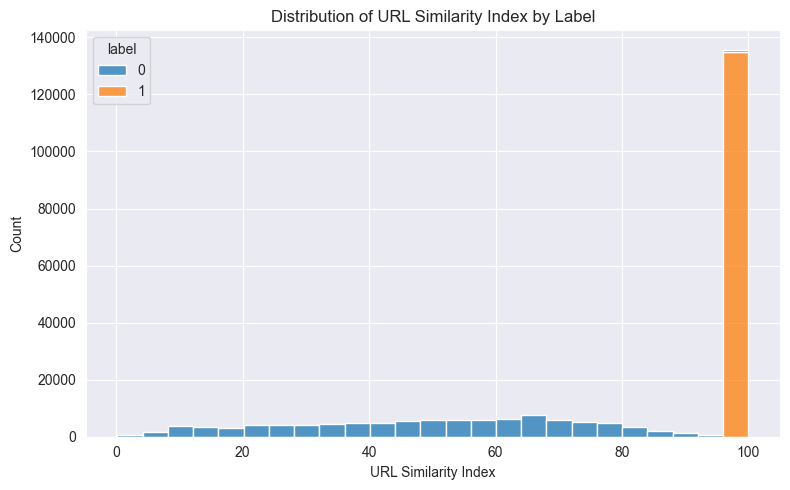

In [148]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='URLSimilarityIndex', hue='label', bins=25, kde=False, multiple='stack')
plt.title('Distribution of URL Similarity Index by Label')
plt.xlabel('URL Similarity Index')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [149]:
df.groupby('label')['URLSimilarityIndex'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,100137.0,49.667606,22.638853,0.155574,31.929983,51.576443,67.381417,100.0
1,134850.0,100.000000,0.000000,100.000000,100.000000,100.000000,100.000000,100.0


- All legitimate websites havve a similarity index of 100%, which makes sense given how the index is generated
- Phishing websites have a wide range of similarity indexs, but anything less than 100% is suspicious

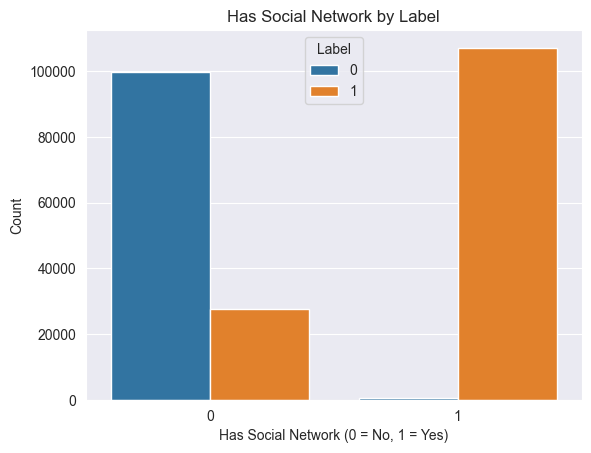

In [150]:
sns.countplot(data=df, x='HasSocialNet', hue='label')
plt.title('Has Social Network by Label')
plt.xlabel('Has Social Network (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()

- Most legitimate websites have a social network attached
- Almost all phishing websites lack an attached social network

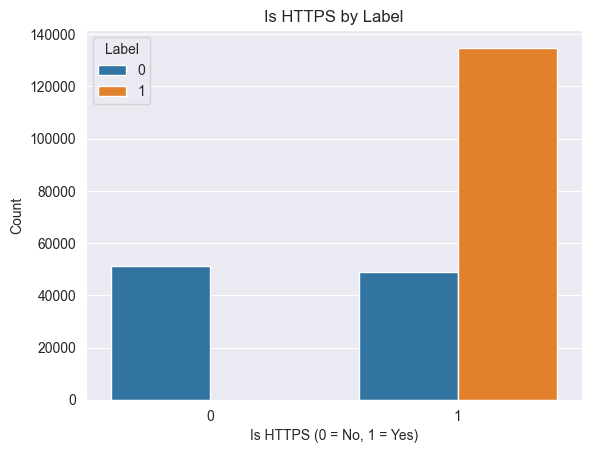

In [151]:
sns.countplot(data=df, x='IsHTTPS', hue='label')
plt.title('Is HTTPS by Label')
plt.xlabel('Is HTTPS (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()

- All legitimate websites are HTTPS
- Half and half split for phishing websites using HTTPS

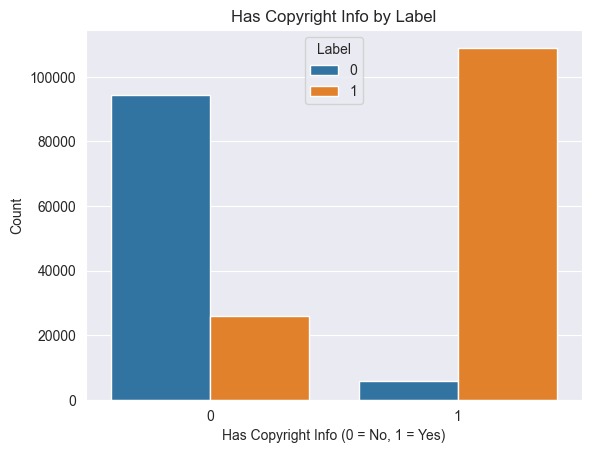

In [152]:
sns.countplot(data=df, x='HasCopyrightInfo', hue='label')
plt.title('Has Copyright Info by Label')
plt.xlabel('Has Copyright Info (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()

- Most legitimate websites have copyright info
- Most phishing websites do not have copyright info

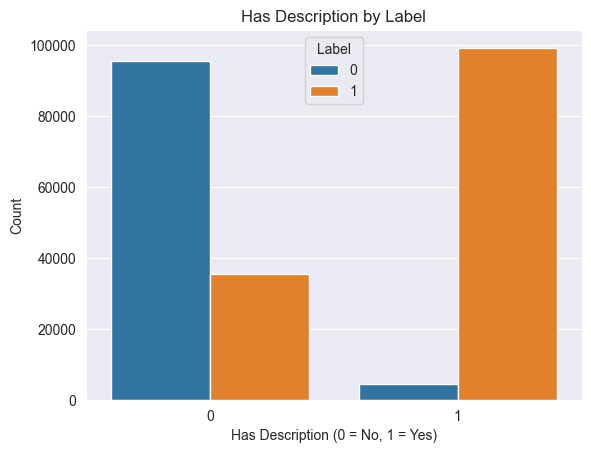

In [153]:
sns.countplot(data=df, x='HasDescription', hue='label')
plt.title('Has Description by Label')
plt.xlabel('Has Description (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()

- Most legitimate websites have a description
- Most phishing websites do not have a description

## Model Selection & Training (With URLSimilarity Index)

In [154]:
X_final = X[selected_features]
y = df_sim['label']

In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier()
}


 Evaluating: Random Forest
              precision    recall  f1-score   support

    Phishing     1.0000    0.9998    0.9999     20028
       Legit     0.9998    1.0000    0.9999     26970

    accuracy                         0.9999     46998
   macro avg     0.9999    0.9999    0.9999     46998
weighted avg     0.9999    0.9999    0.9999     46998



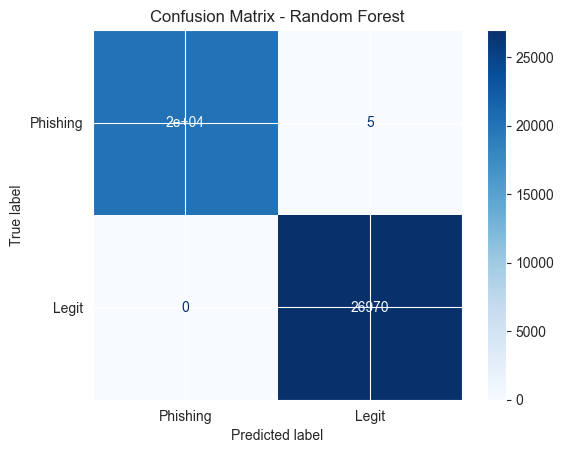


 Evaluating: Logistic Regression
              precision    recall  f1-score   support

    Phishing     1.0000    0.9997    0.9999     20028
       Legit     0.9998    1.0000    0.9999     26970

    accuracy                         0.9999     46998
   macro avg     0.9999    0.9999    0.9999     46998
weighted avg     0.9999    0.9999    0.9999     46998



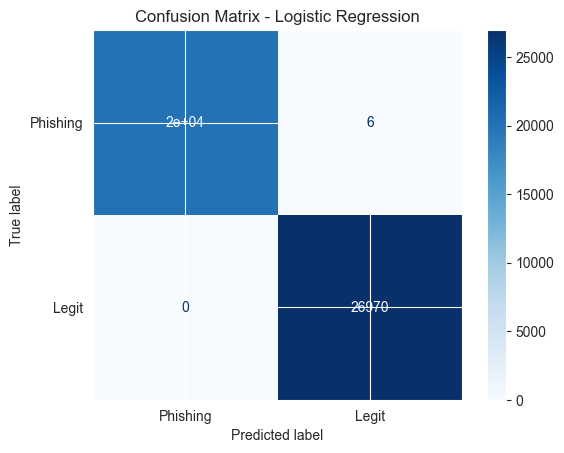


 Evaluating: KNN
              precision    recall  f1-score   support

    Phishing     1.0000    0.9997    0.9999     20028
       Legit     0.9998    1.0000    0.9999     26970

    accuracy                         0.9999     46998
   macro avg     0.9999    0.9999    0.9999     46998
weighted avg     0.9999    0.9999    0.9999     46998



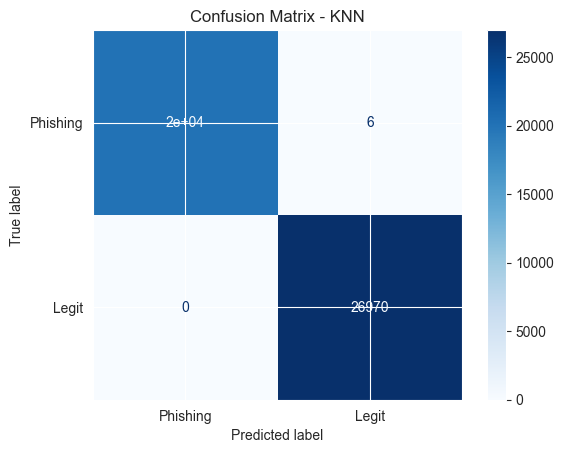

In [156]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, stratify=y, random_state=42
)

for name, model in models.items():
    print(f"\n Evaluating: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=["Phishing", "Legit"], digits=4))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Phishing", "Legit"], cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

### Verify Not Overfitting

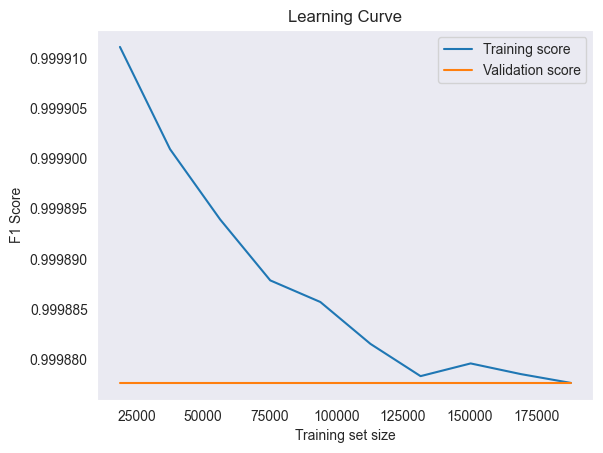

In [157]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    RandomForestClassifier(random_state=42),
    X_final, y, cv=5, scoring='f1', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, val_scores_mean, label='Validation score')
plt.title('Learning Curve')
plt.xlabel('Training set size')
plt.ylabel('F1 Score')
plt.legend()
plt.grid()
plt.show()

Curves close together, no overfitting.

### Finalizing Model

In [158]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    class_weight={0: 1.5, 1: 1},
    random_state=42
)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1.5, 1: 1}, n_estimators=200,
                       random_state=42)

In [159]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)
best_rf = grid.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [160]:
# y_probs = best_rf.predict_proba(X_test)[:, 1] # Probabilities for class "1" (Legit)

In [161]:
# 
# thresholds = np.arange(0.3, 0.71, 0.01) # try thresholds between 0.3 and 0.7
# 
# for t in thresholds:
#   y_pred = (y_probs > t).astype(int)
#   cm = confusion_matrix(y_test, y_pred)
#   tn, fp, fn, tp = cm.ravel()
#   print(f"Threshold: {t:.2f} FP: {fp}, FN: {fn}, TP: {tp}, TN: {tn}")

No success in decreasing error with changing treshold or gridsearch

 Final Cross-Validated Evaluation (Treshold = 0.50)
              precision    recall  f1-score   support

    Phishing   1.000000  0.999670  0.999835    100137
       Legit   0.999755  1.000000  0.999878    134850

    accuracy                       0.999860    234987
   macro avg   0.999878  0.999835  0.999856    234987
weighted avg   0.999860  0.999860  0.999860    234987



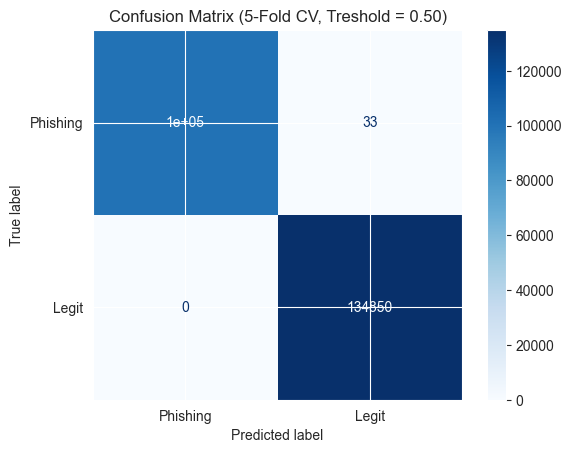

In [162]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use predict instead of predict_proba to apply the default threshold (typically 0.5)
y_pred_cv = cross_val_predict(best_rf, X_final, y, cv=cv, method='predict', n_jobs=-1)

# Print classification report
print(" Final Cross-Validated Evaluation (Treshold = 0.50)")
print(classification_report(y, y_pred_cv, target_names=["Phishing", "Legit"], digits=6))

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y, y_pred_cv,
    display_labels=["Phishing", "Legit"],
    cmap="Blues"
)
plt.title("Confusion Matrix (5-Fold CV, Treshold = 0.50)")
plt.show()

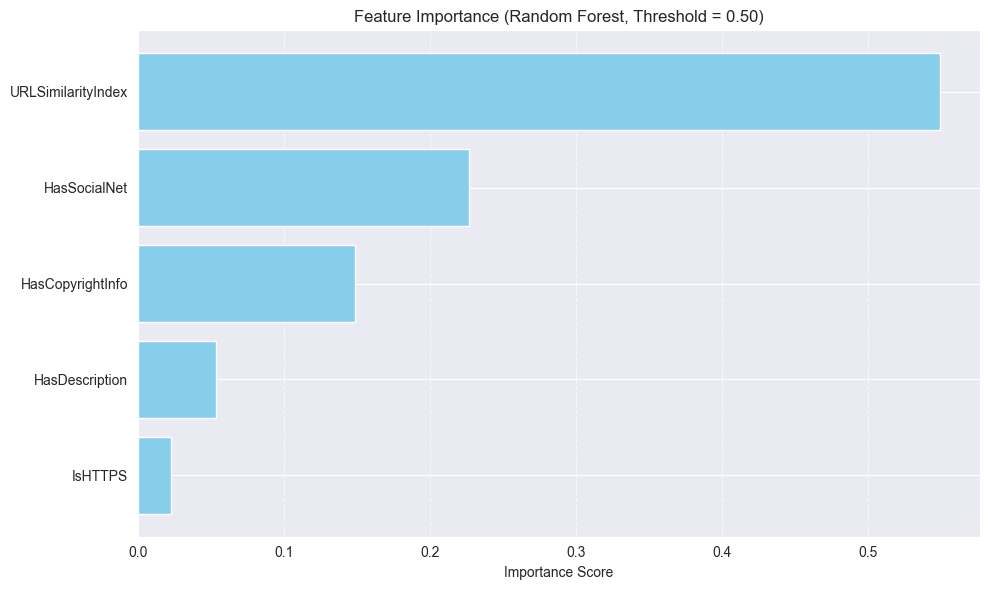

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the same feature order in X_final as used in training
feature_importances = best_rf.feature_importances_
features = X_final.columns

# Create a DataFrame for easier plotting and sorting
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance (Random Forest, Threshold = 0.50)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [164]:
import joblib
# Save Model
joblib.dump(best_rf, 'random_forest_model_with_URLSimilarityIndex.pkl')

['random_forest_model_with_URLSimilarityIndex.pkl']

In [165]:
import pandas as pd

# Combine features and labels
df_cv_data = X_final.copy()
df_cv_data['label'] = y.values  # attach the labels

# Count unique instances per class
unique_counts = df_cv_data.groupby('label').apply(lambda g: g.drop_duplicates().shape[0])

# Display result
print("Unique instances per class (after feature selection):")
print(unique_counts)

Unique instances per class (after feature selection):
label
0    45243
1        8
dtype: int64


C:\Users\Chris\AppData\Local\Temp\ipykernel_6996\1896709741.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  unique_counts = df_cv_data.groupby('label').apply(lambda g: g.drop_duplicates().shape[0])


Severely low count of unqiue legitimate instances

## Feature Selection Using L1 Regularization (Without URLSimilarityIndex)

### Scaling

In [166]:
X = df_nosim.drop(columns='label')

# Initialize Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Manual Tradeoff Exploration

In [167]:
# # Manual Tradeoff Exploration
from sklearn.metrics import f1_score

results = []

# # MARKDOWN BELOW IS THE RESULTS - UNCOMMENT TO RUN BUT IT TAKES A WHILE # # #

#Manually look at performance of each C value

for C in [1.0, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]:
  model = LogisticRegression(penalty='l1', solver='saga', C=C, max_iter=5000, random_state=42, n_jobs=-1)
  model.fit(X_scaled, y)

  y_pred = model.predict(X_scaled)
  f1 = f1_score(y, y_pred)
  num_features = np.sum(model.coef_[0] != 0)

  print(f"C={C:<6} F1 Score: {f1:.4f} | Features kept: {num_features}")
  results.append((C, f1, num_features))

# Show results
# for C, f1, n in results:
#   print(f"C={C:<6} F1 Score: {f1:.4f} | Features kept: {n}")

C=1.0    F1 Score: 0.9988 | Features kept: 41
C=0.5    F1 Score: 0.9988 | Features kept: 41
C=0.1    F1 Score: 0.9988 | Features kept: 37
C=0.05   F1 Score: 0.9987 | Features kept: 37
C=0.01   F1 Score: 0.9982 | Features kept: 27
C=0.005  F1 Score: 0.9977 | Features kept: 26
C=0.001  F1 Score: 0.9954 | Features kept: 18
C=0.0005 F1 Score: 0.9932 | Features kept: 14
C=0.0001 F1 Score: 0.9790 | Features kept: 9


- C=1.0     F1 Score: 0.9988 | Features kept: 41
- C=0.5     F1 Score: 0.9988 | Features kept: 41
- C=0.1     F1 Score: 0.9988 | Features kept: 37
- C=0.05    F1 Score: 0.9987 | Features kept: 37
- C=0.01    F1 Score: 0.9982 | Features kept: 27
- C=0.005   F1 Score: 0.9977 | Features kept: 26
- C=0.001   F1 Score: 0.9954 | Features kept: 18
- C=0.0005  F1 Score: 0.9932 | Features kept: 14
- C=0.0001  F1 Score: 0.9790 | Features kept: 9

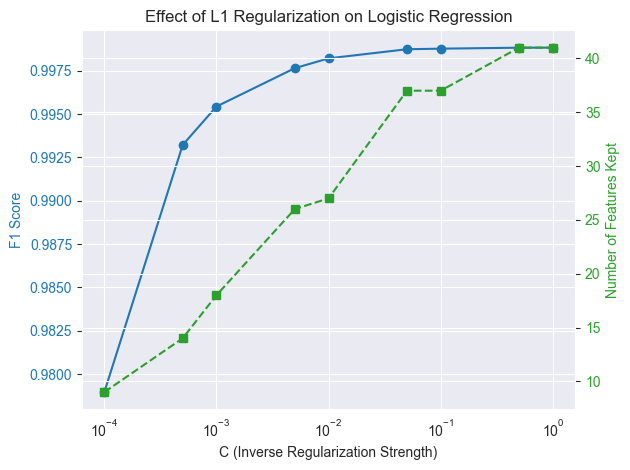

In [168]:
# Sort results by C value ascending
results.sort(key=lambda x: x[0])

C_vals, f1_scores, num_features = zip(*results)

fig, ax1 = plt.subplots()

# F1 Score line
ax1.plot(C_vals, f1_scores, marker='o', label='F1 Score', color='tab:blue')
ax1.set_xscale('log')
ax1.set_xlabel('C (Inverse Regularization Strength)')
ax1.set_ylabel('F1 Score', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Features kept line
ax2 = ax1.twinx()
ax2.plot(C_vals, num_features, marker='s', label='Number of Features Kept', color='tab:green', linestyle='--')
ax2.set_ylabel('Number of Features Kept', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Title
plt.title('Effect of L1 Regularization on Logistic Regression')

fig.tight_layout()
plt.show()

I tested various levels of feature sparsity using L1 regularization. The model with 14 features maintained a high F1 score of 0.9932, making it an ideal balance between performance and simplicity. Although a 9-feature model was possible, it resulted in a lower F1 score (0.9790), which could increase the risk of false negatives in a real-world deployment

In [169]:
# Re-train model at chosen C
model = LogisticRegression(penalty='l1', solver='saga', C=0.0005, max_iter=5000, random_state=42)
model.fit(X_scaled, y)

# Extract selected features
selected_mask = model.coef_[0] != 0
selected_features = X.columns[selected_mask]

print("Final selected features:")
print(selected_features.tolist())

Final selected features:
['CharContinuationRate', 'NoOfSubDomain', 'LetterRatioInURL', 'NoOfOtherSpecialCharsInURL', 'IsHTTPS', 'DomainTitleMatchScore', 'HasFavicon', 'IsResponsive', 'HasDescription', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasCopyrightInfo', 'NoOfJS']


### Feature Analysis

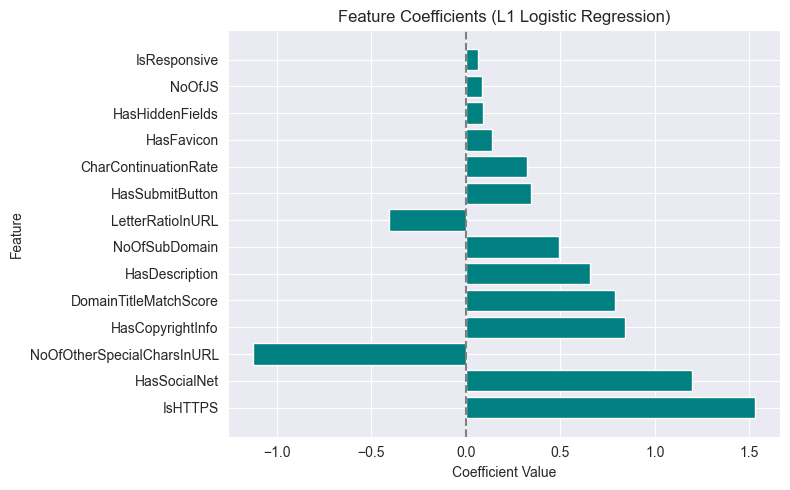

In [170]:
# Get coefficients
coefs = model.coef_[0]
selected_coefs = coefs[selected_mask]

# Build dataframe for easy plotting
coef_df = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': selected_coefs
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Plot
plt.figure(figsize=(8, 5))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='teal')
plt.axvline(0, color='gray', linestyle='--')
plt.title('Feature Coefficients (L1 Logistic Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

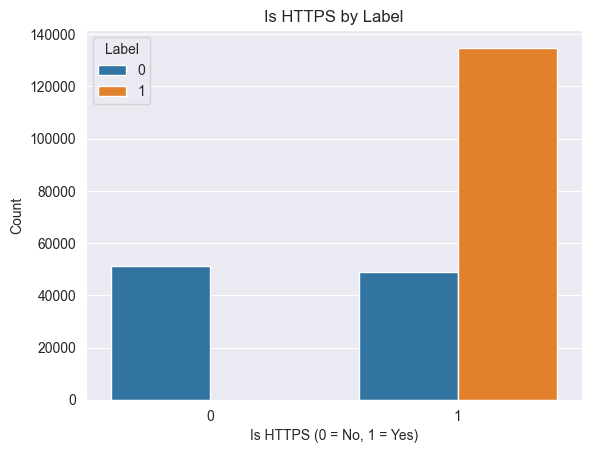

In [171]:
sns.countplot(data=df, x='IsHTTPS', hue='label')
plt.title('Is HTTPS by Label')
plt.xlabel('Is HTTPS (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()

- All legitimate sites use HTTPS
- Phishing sites are split between HTTPS and non-HTTPS

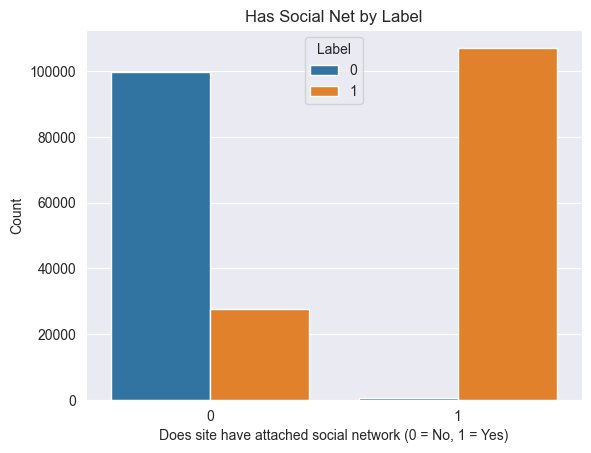

In [172]:
sns.countplot(data=df, x='HasSocialNet', hue='label')
plt.title('Has Social Net by Label')
plt.xlabel('Does site have attached social network (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()

- Legitimate sites often have links to social media
- Phishing sites rarely have links to social media

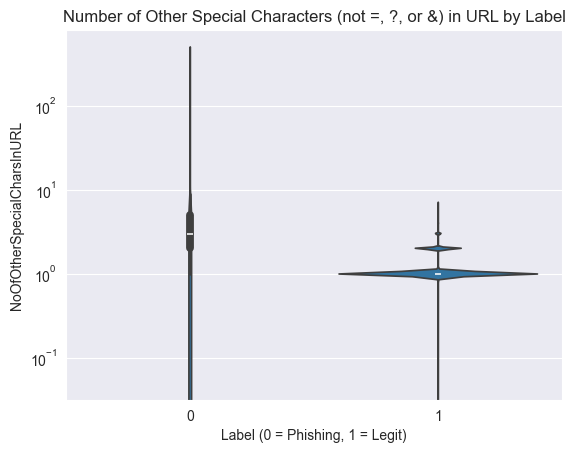

In [173]:
sns.violinplot(data=df, x='label', y='NoOfOtherSpecialCharsInURL')
plt.yscale('log')
plt.title('Number of Other Special Characters (not =, ?, or &) in URL by Label')
plt.xlabel('Label (0 = Phishing, 1 = Legit)')
plt.ylabel('NoOfOtherSpecialCharsInURL')
plt.show()

- Legitimate URLS tend to have much less and are more uniform
  - Phishing URLs contain more random amounts of special characters

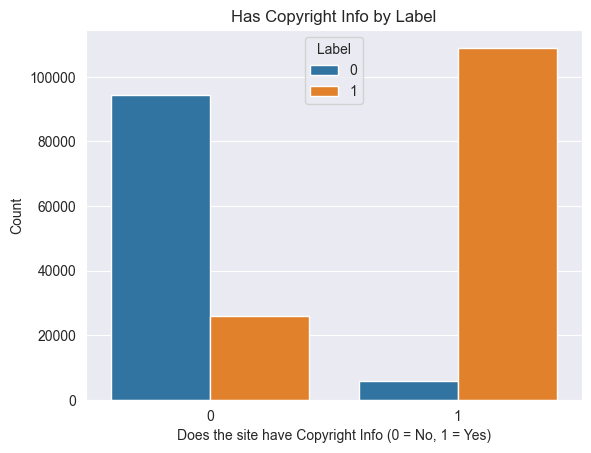

In [174]:
sns.countplot(data=df, x='HasCopyrightInfo', hue='label')
plt.title('Has Copyright Info by Label')
plt.xlabel('Does the site have Copyright Info (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()

- Legitimate sites often have copyright info
- Phishing sites often do not

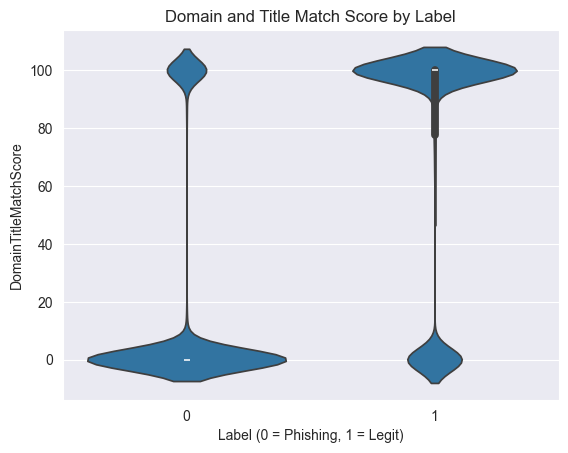

In [175]:
sns.violinplot(data=df, x='label', y='DomainTitleMatchScore')
plt.title('Domain and Title Match Score by Label')
plt.xlabel('Label (0 = Phishing, 1 = Legit)')
plt.ylabel('DomainTitleMatchScore')
plt.show()

- Legitimate sites tend to have a much higher match between domain and title
- Phishing sites typically don't have a high match

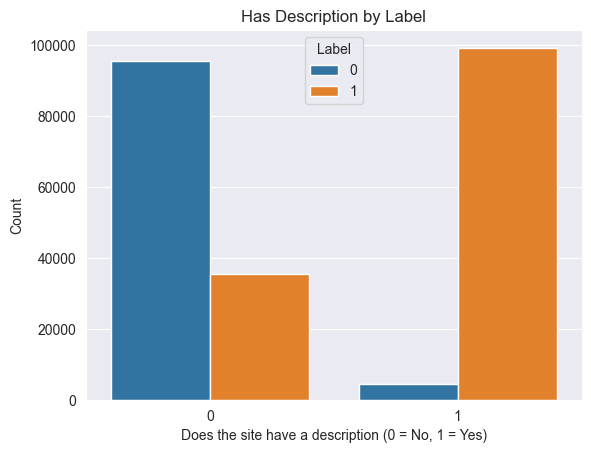

In [176]:
sns.countplot(data=df, x='HasDescription', hue='label')
plt.title('Has Description by Label')
plt.xlabel('Does the site have a description (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()

- Most legitimate websites have a meta description
- Most phishing websites do not

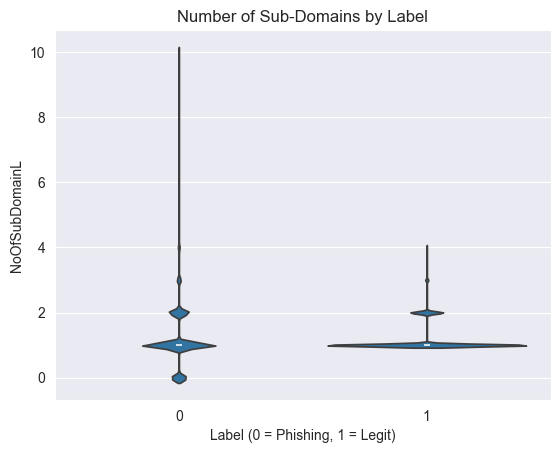

In [177]:
sns.violinplot(data=df, x='label', y='NoOfSubDomain')
plt.title('Number of Sub-Domains by Label')
plt.xlabel('Label (0 = Phishing, 1 = Legit)')
plt.ylabel('NoOfSubDomainL')
plt.show()

- Phishing sites have a much wider distribution of sub-domain counts

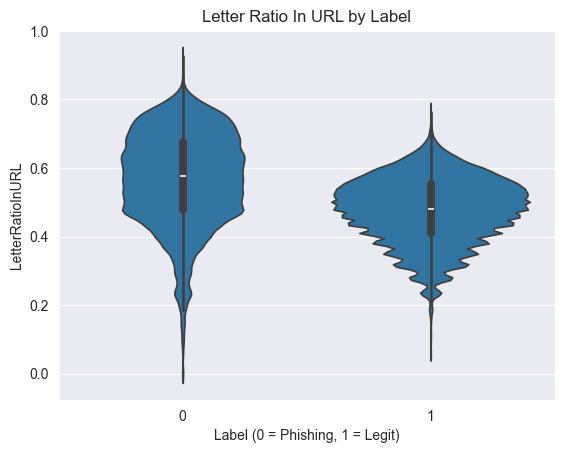

In [178]:
sns.violinplot(data=df, x='label', y='LetterRatioInURL')
plt.title('Letter Ratio In URL by Label')
plt.xlabel('Label (0 = Phishing, 1 = Legit)')
plt.ylabel('LetterRatioInURL')
plt.show()

- Phishing sites generally have a higher letter ratio in URL

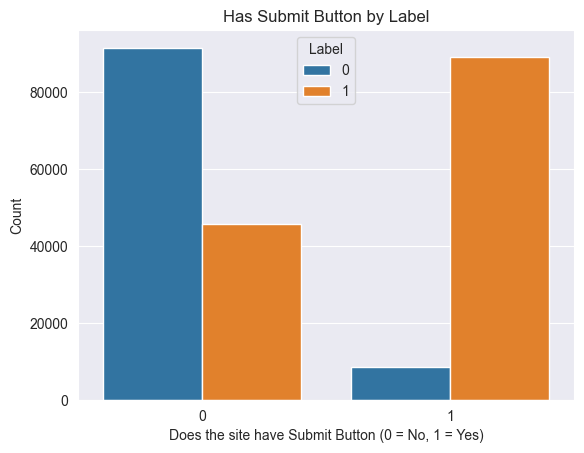

In [179]:
sns.countplot(data=df, x='HasSubmitButton', hue='label')
plt.title('Has Submit Button by Label')
plt.xlabel('Does the site have Submit Button (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()

- Submit buttons common on both

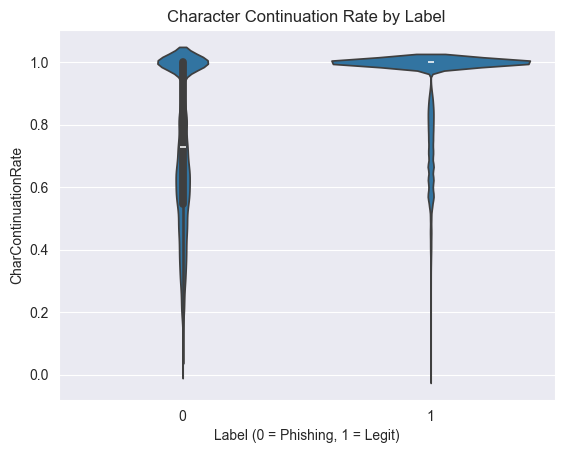

In [180]:
sns.violinplot(data=df, x='label', y='CharContinuationRate')
plt.title('Character Continuation Rate by Label')
plt.xlabel('Label (0 = Phishing, 1 = Legit)')
plt.ylabel('CharContinuationRate')
plt.show()

- Legitimate URLs have a smoother character flow
- Phishing domains use odd or broken character patterns

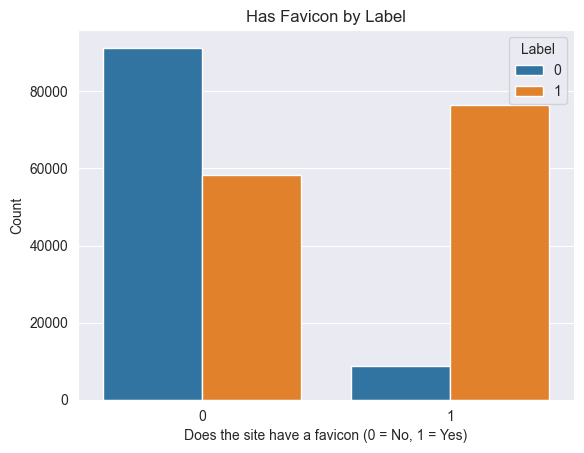

In [181]:
sns.countplot(data=df, x='HasFavicon', hue='label')
plt.title('Has Favicon by Label')
plt.xlabel('Does the site have a favicon (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()

- Legitimate sites are more likely to have a favicon
- Phishing sites tend to not have a favicon

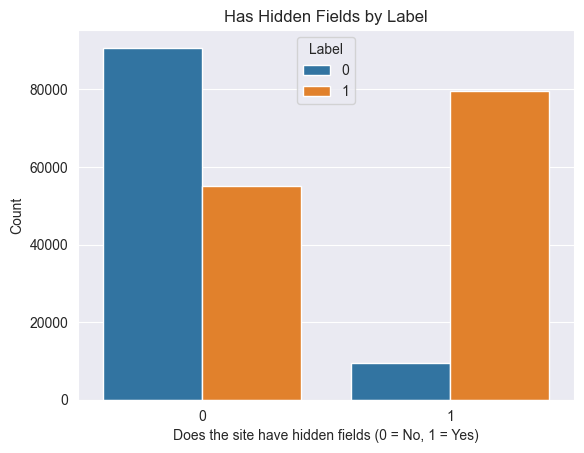

In [182]:
sns.countplot(data=df, x='HasHiddenFields', hue='label')
plt.title('Has Hidden Fields by Label')
plt.xlabel('Does the site have hidden fields (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()

- Hidden Fields are more common on phishing sites, though they are present on both

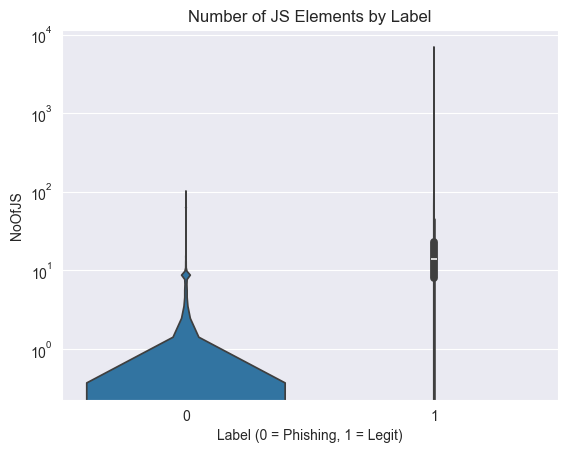

In [183]:
sns.violinplot(data=df, x='label', y='NoOfJS')
plt.yscale('log')
plt.title('Number of JS Elements by Label')
plt.xlabel('Label (0 = Phishing, 1 = Legit)')
plt.ylabel('NoOfJS')
plt.show()

- Legitimate sites tend to have more JS scripts
- Phishing sites tend to have far fewer

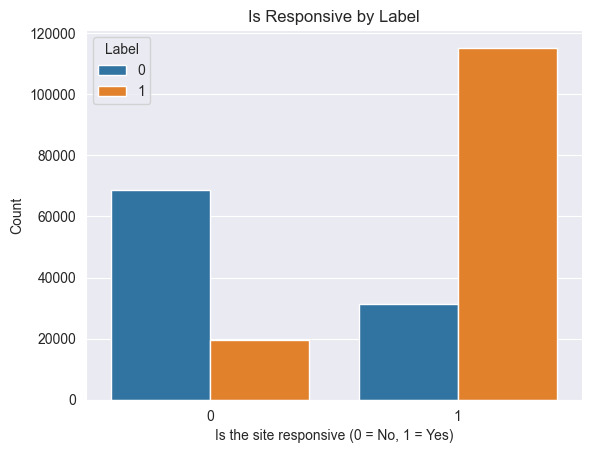

In [184]:
sns.countplot(data=df, x='IsResponsive', hue='label')
plt.title('Is Responsive by Label')
plt.xlabel('Is the site responsive (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()

- Legitimate sites are more likely to be responsive (mobile-friendly)
- Phishing pages often do not

## Model Selection & Training (Without URLSimilarityIndex)

In [185]:

X_final = X[selected_features]
y = df_nosim['label']

In [186]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42), #Works the best
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier()
}


Evaluating: Random Forest
              precision    recall  f1-score   support

    Phishing     0.9991    0.9985    0.9988     20028
       Legit     0.9989    0.9993    0.9991     26970

    accuracy                         0.9990     46998
   macro avg     0.9990    0.9989    0.9989     46998
weighted avg     0.9990    0.9990    0.9990     46998



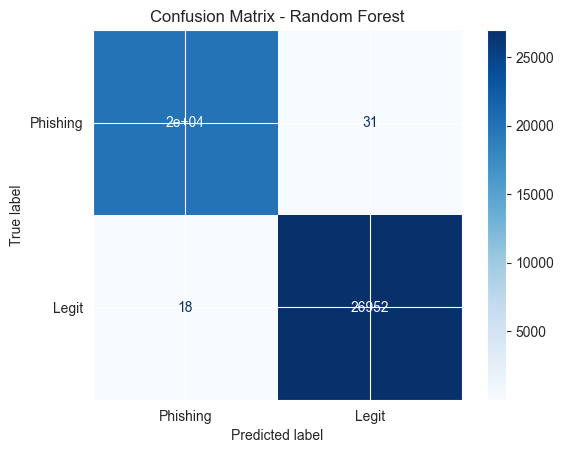


Evaluating: Logistic Regression
              precision    recall  f1-score   support

    Phishing     0.9973    0.9954    0.9964     20028
       Legit     0.9966    0.9980    0.9973     26970

    accuracy                         0.9969     46998
   macro avg     0.9970    0.9967    0.9968     46998
weighted avg     0.9969    0.9969    0.9969     46998



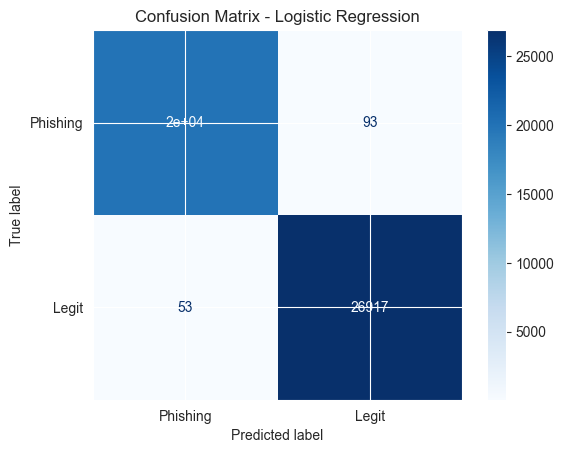


Evaluating: KNN
              precision    recall  f1-score   support

    Phishing     0.9981    0.9949    0.9965     20028
       Legit     0.9962    0.9986    0.9974     26970

    accuracy                         0.9970     46998
   macro avg     0.9971    0.9967    0.9969     46998
weighted avg     0.9970    0.9970    0.9970     46998



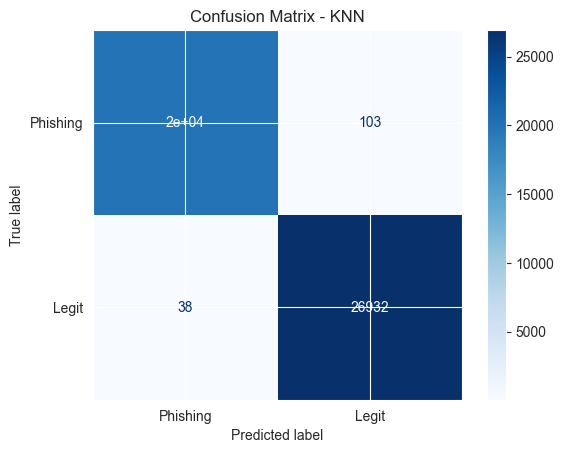

In [187]:
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, stratify=y, random_state=42
)

for name, model in models.items():
    print(f"\nEvaluating: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=["Phishing", "Legit"], digits=4))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Phishing", "Legit"], cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

### Verify Not Overfitting

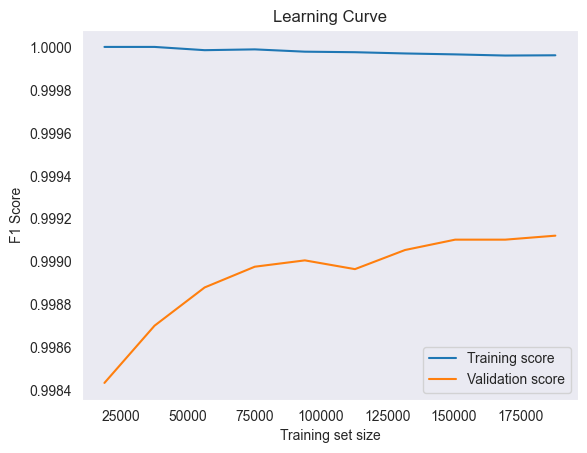

In [188]:
train_sizes, train_scores, val_scores = learning_curve(
    RandomForestClassifier(random_state=42),
    X_final, y, cv=5, scoring='f1', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, val_scores_mean, label='Validation score')
plt.title('Learning Curve')
plt.xlabel('Training set size')
plt.ylabel('F1 Score')
plt.legend()
plt.grid()
plt.show()

Curves close together, no overfitting

### Finalizing Model

I would like to prioritize FNs over FPs.

In [189]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    class_weight={0: 1.5, 1: 1},
    random_state=42
)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1.5, 1: 1}, n_estimators=200,
                       random_state=42)

In [190]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)
best_rf = grid.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


Grid search only helped reduce overall error. I struggled in getting it to make FPs lower than FNs

In [191]:
y_probs = best_rf.predict_proba(X_test)[:, 1]  # Probabilities for class "1" (Legitimate)

In [192]:
from sklearn.metrics import confusion_matrix

thresholds = np.arange(0.3, 0.71, 0.01)  # try thresholds between 0.3 and 0.7

for t in thresholds:
    y_pred = (y_probs > t).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    print(f"Threshold: {t:.2f}  FP: {fp}, FN: {fn}, TP: {tp}, TN: {tn}")

Threshold: 0.30  FP: 52, FN: 4, TP: 26966, TN: 19976
Threshold: 0.31  FP: 50, FN: 4, TP: 26966, TN: 19978
Threshold: 0.32  FP: 48, FN: 5, TP: 26965, TN: 19980
Threshold: 0.33  FP: 47, FN: 6, TP: 26964, TN: 19981
Threshold: 0.34  FP: 47, FN: 6, TP: 26964, TN: 19981
Threshold: 0.35  FP: 45, FN: 6, TP: 26964, TN: 19983
Threshold: 0.36  FP: 44, FN: 7, TP: 26963, TN: 19984
Threshold: 0.37  FP: 43, FN: 7, TP: 26963, TN: 19985
Threshold: 0.38  FP: 42, FN: 8, TP: 26962, TN: 19986
Threshold: 0.39  FP: 42, FN: 9, TP: 26961, TN: 19986
Threshold: 0.40  FP: 40, FN: 11, TP: 26959, TN: 19988
Threshold: 0.41  FP: 38, FN: 12, TP: 26958, TN: 19990
Threshold: 0.42  FP: 38, FN: 13, TP: 26957, TN: 19990
Threshold: 0.43  FP: 37, FN: 13, TP: 26957, TN: 19991
Threshold: 0.44  FP: 35, FN: 13, TP: 26957, TN: 19993
Threshold: 0.45  FP: 33, FN: 14, TP: 26956, TN: 19995
Threshold: 0.46  FP: 32, FN: 14, TP: 26956, TN: 19996
Threshold: 0.47  FP: 32, FN: 15, TP: 26955, TN: 19996
Threshold: 0.48  FP: 32, FN: 15, TP: 2

 Final Cross-Validated Evaluation at Threshold = 0.64
              precision    recall  f1-score   support

    Phishing   0.997846  0.999191  0.998518    100137
       Legit   0.999399  0.998398  0.998898    134850

    accuracy                       0.998736    234987
   macro avg   0.998622  0.998795  0.998708    234987
weighted avg   0.998737  0.998736  0.998736    234987



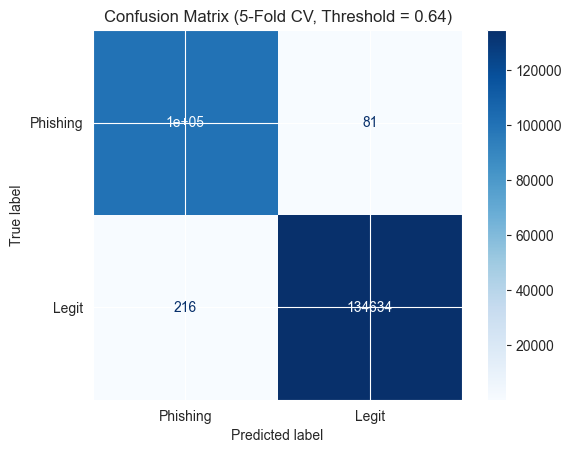

In [193]:
best_threshold = 0.64

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_probs_cv = cross_val_predict(best_rf, X_final, y, cv=cv, method='predict_proba', n_jobs=-1)

y_pred_cv = (y_probs_cv[:, 1] > best_threshold).astype(int)

# Print classification report
print(f" Final Cross-Validated Evaluation at Threshold = {best_threshold}")
print(classification_report(y, y_pred_cv, target_names=["Phishing", "Legit"], digits=6))

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y, y_pred_cv,
    display_labels=["Phishing", "Legit"],
    cmap="Blues"
)
plt.title(f"Confusion Matrix (5-Fold CV, Threshold = {best_threshold})")
plt.show()

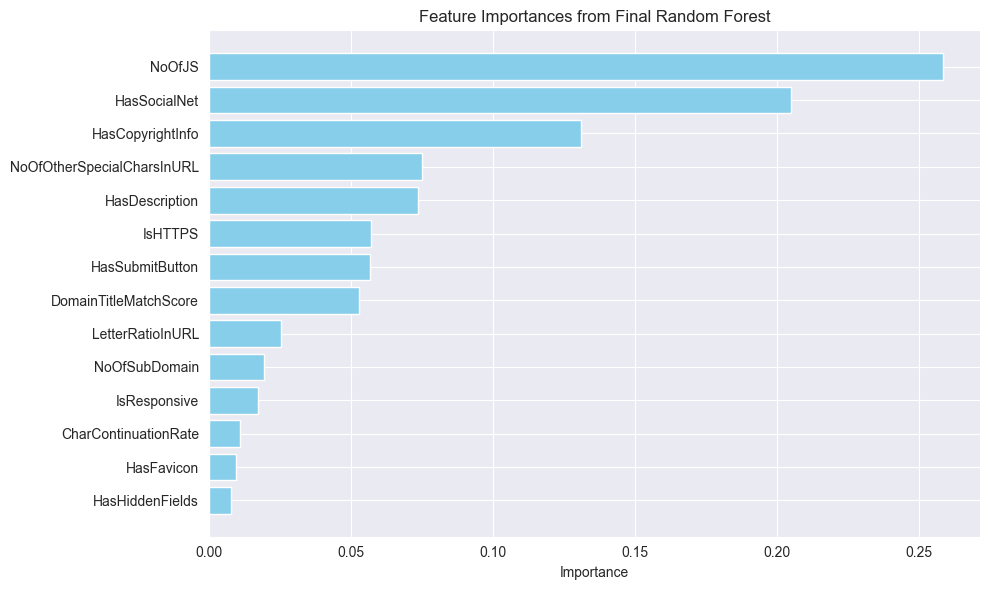

                       Feature  Importance
13                      NoOfJS    0.258413
9                 HasSocialNet    0.204724
12            HasCopyrightInfo    0.131115
3   NoOfOtherSpecialCharsInURL    0.074896
8               HasDescription    0.073582
4                      IsHTTPS    0.057134
10             HasSubmitButton    0.056759
5        DomainTitleMatchScore    0.052673
2             LetterRatioInURL    0.025513
1                NoOfSubDomain    0.019573


In [194]:
import pandas as pd
import matplotlib.pyplot as plt

importances = best_rf.feature_importances_
feature_names = X_final.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Most important at the top
plt.title('Feature Importances from Final Random Forest')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

print(importance_df.head(10))

In [195]:
# Save Model
joblib.dump(best_rf, 'random_forest_model_without_URLSimilarityIndex.pkl')

['random_forest_model_without_URLSimilarityIndex.pkl']

In [196]:
import pandas as pd

# Combine features and labels
df_cv_data = X_final.copy()
df_cv_data['label'] = y.values  # attach the labels

# Count unique instances per class
unique_counts = df_cv_data.groupby('label').apply(lambda g: g.drop_duplicates().shape[0])

# Display result
print("Unique instances per class (after feature selection):")
print(unique_counts)

Unique instances per class (after feature selection):
label
0    45182
1    73776
dtype: int64


C:\Users\Chris\AppData\Local\Temp\ipykernel_6996\1896709741.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  unique_counts = df_cv_data.groupby('label').apply(lambda g: g.drop_duplicates().shape[0])


## Combined Approach

### Assigning Features

In [197]:
# Assigning features
selected_features = [
    'IsResponsive',
    'NoOfJS',
    'HasHiddenFields',
    'HasFavicon',
    'CharContinuationRate',
    'HasSubmitButton',
    'LetterRatioInURL',
    'NoOfSubDomain',
    'HasDescription',
    'DomainTitleMatchScore',
    'HasCopyrightInfo',
    'NoOfOtherSpecialCharsInURL',
    'HasSocialNet',
    'IsHTTPS',
    'URLSimilarityIndex'
]

print(df_for_final.shape)

df_holdout = df_for_final[selected_features + ['label']].sample(n=100, random_state=42)
df_train = df_for_final.drop(df_holdout.index)

print(df_holdout.shape)
print(df_train.shape)

X = df_train[selected_features]
y = df_train['label']


(234987, 43)
(100, 16)
(234887, 43)


In [198]:
df_count = df_for_final[selected_features + ['label']].copy()

# Exclude the label column when checking for duplicates
feature_cols = df_count.columns.difference(['label'])

# Drop duplicates based on features only, then count per label
unique_per_label = df_count.drop_duplicates(subset=feature_cols)['label'].value_counts()

print("Number of unique instances per label:")
print(unique_per_label.sort_index())

Number of unique instances per label:
label
0    78443
1    73776
Name: count, dtype: int64


In [199]:
# df_test = df_test.drop_duplicates()
# 
# X = df_test[selected_features]
# y = df_test['label']

In [200]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

### GridSearch

In [201]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight={0: 1.5, 1: 1.0})

grid = GridSearchCV(rf, param_grid, scoring='f1', cv=3, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

best_rf = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


### Threshold Tuning

In [202]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Predict probabilities on test set
y_probs = best_rf.predict_proba(X_test)

# Threshold sweep
for thresh in np.arange(0.30, 0.71, 0.01):
    y_pred_thresh = (y_probs[:, 1] > thresh).astype(int)
    cm = confusion_matrix(y_test, y_pred_thresh)
    fn = cm[0][1]
    fp = cm[1][0]
    print(f"Threshold: {thresh:.2f} → FP: {fp}, FN: {fn}, Total Errors: {fp + fn}")

Threshold: 0.30 → FP: 0, FN: 1, Total Errors: 1
Threshold: 0.31 → FP: 0, FN: 1, Total Errors: 1
Threshold: 0.32 → FP: 0, FN: 1, Total Errors: 1
Threshold: 0.33 → FP: 0, FN: 1, Total Errors: 1
Threshold: 0.34 → FP: 0, FN: 0, Total Errors: 0
Threshold: 0.35 → FP: 0, FN: 0, Total Errors: 0
Threshold: 0.36 → FP: 0, FN: 0, Total Errors: 0
Threshold: 0.37 → FP: 0, FN: 0, Total Errors: 0
Threshold: 0.38 → FP: 0, FN: 0, Total Errors: 0
Threshold: 0.39 → FP: 0, FN: 0, Total Errors: 0
Threshold: 0.40 → FP: 0, FN: 0, Total Errors: 0
Threshold: 0.41 → FP: 0, FN: 0, Total Errors: 0
Threshold: 0.42 → FP: 0, FN: 0, Total Errors: 0
Threshold: 0.43 → FP: 0, FN: 0, Total Errors: 0
Threshold: 0.44 → FP: 0, FN: 0, Total Errors: 0
Threshold: 0.45 → FP: 0, FN: 0, Total Errors: 0
Threshold: 0.46 → FP: 0, FN: 0, Total Errors: 0
Threshold: 0.47 → FP: 0, FN: 0, Total Errors: 0
Threshold: 0.48 → FP: 0, FN: 0, Total Errors: 0
Threshold: 0.49 → FP: 0, FN: 0, Total Errors: 0
Threshold: 0.50 → FP: 0, FN: 0, Total Er


Final Cross-Validated Evaluation at Threshold = 0.7
              precision    recall  f1-score   support

    Phishing   0.999970  0.999960  0.999965    100100
       Legit   0.999970  0.999978  0.999974    134787

    accuracy                       0.999970    234887
   macro avg   0.999970  0.999969  0.999970    234887
weighted avg   0.999970  0.999970  0.999970    234887



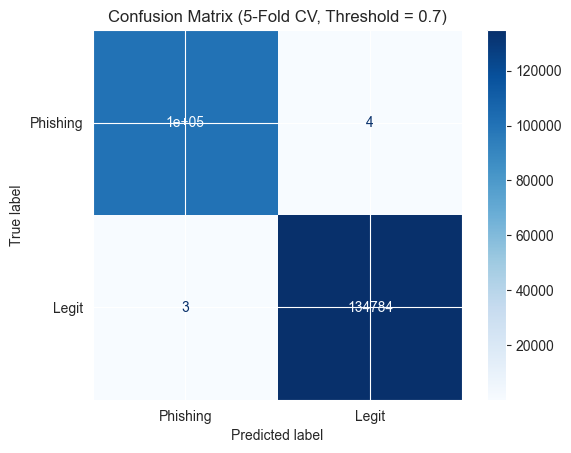

In [203]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

best_threshold = 0.70 #0.80 Gave less FPs, but threshold may be too high
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Predict probabilities for CV
y_probs_cv = cross_val_predict(best_rf, X, y, cv=cv, method='predict_proba', n_jobs=-1)

# Apply threshold
y_pred_cv = (y_probs_cv[:, 1] > best_threshold).astype(int)

# Report
print(f"\nFinal Cross-Validated Evaluation at Threshold = {best_threshold}")
print(classification_report(y, y_pred_cv, target_names=["Phishing", "Legit"], digits=6))

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y, y_pred_cv, display_labels=["Phishing", "Legit"], cmap='Blues'
)
plt.title(f"Confusion Matrix (5-Fold CV, Threshold = {best_threshold})")
plt.show()


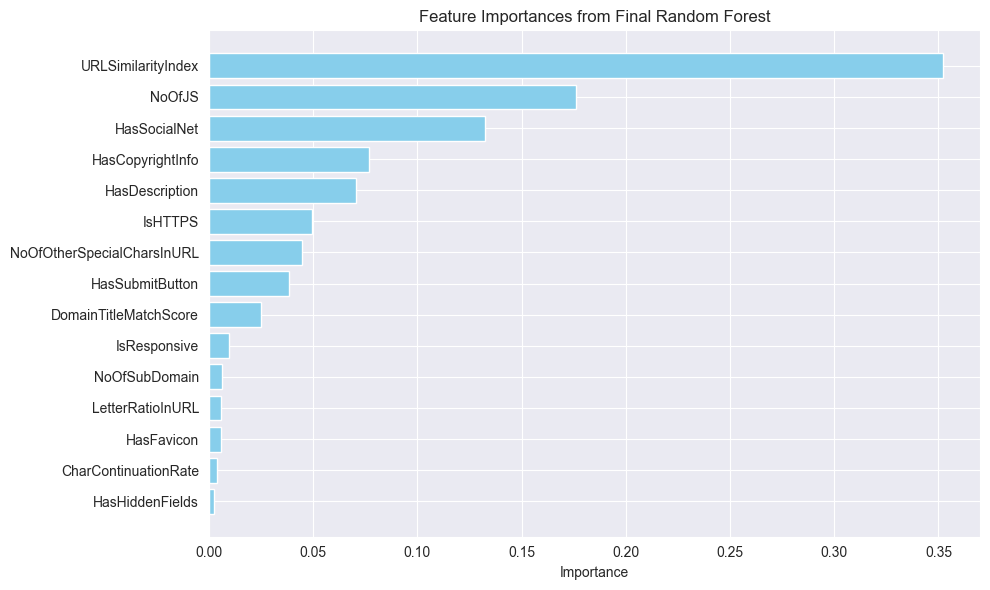

                       Feature  Importance
14          URLSimilarityIndex    0.352307
1                       NoOfJS    0.176319
12                HasSocialNet    0.132699
10            HasCopyrightInfo    0.076692
8               HasDescription    0.070677
13                     IsHTTPS    0.049388
11  NoOfOtherSpecialCharsInURL    0.044537
5              HasSubmitButton    0.038244
9        DomainTitleMatchScore    0.024787
0                 IsResponsive    0.009552


In [204]:
import pandas as pd
import matplotlib.pyplot as plt

importances = best_rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Most important at the top
plt.title('Feature Importances from Final Random Forest')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

print(importance_df.head(10))


### Learning Curve

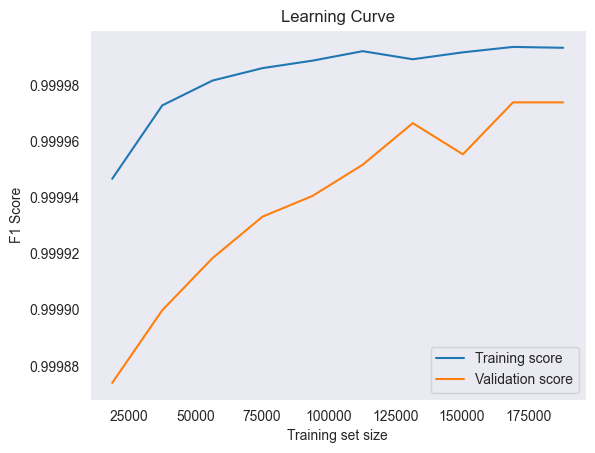

In [205]:
train_sizes, train_scores, val_scores = learning_curve(
    best_rf,
    X, y,
    cv=5,
    scoring='f1',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, val_scores_mean, label='Validation score')
plt.title('Learning Curve')
plt.xlabel('Training set size')
plt.ylabel('F1 Score')
plt.legend()
plt.grid()
plt.show()

### Final Test on Heldout Data

              precision    recall  f1-score   support

    Phishing       1.00      1.00      1.00        37
       Legit       1.00      1.00      1.00        63

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



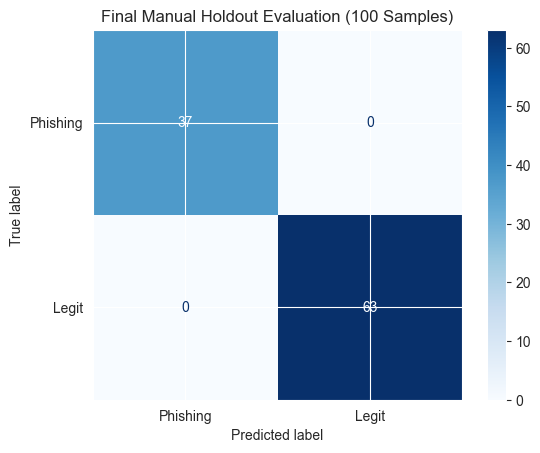

In [206]:
# Prepare the holdout data
X_holdout = df_holdout.drop(columns='label')
y_holdout = df_holdout['label']

# Predict probabilities and apply threshold
y_holdout_probs = best_rf.predict_proba(X_holdout)[:, 1]
y_holdout_pred = (y_holdout_probs > best_threshold).astype(int)

# Evaluate
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report(y_holdout, y_holdout_pred, target_names=["Phishing", "Legit"]))

ConfusionMatrixDisplay.from_predictions(
    y_holdout, y_holdout_pred,
    display_labels=["Phishing", "Legit"],
    cmap="Blues"
)
plt.title("Final Manual Holdout Evaluation (100 Samples)")
plt.show()


In [207]:
joblib.dump(best_rf, 'random_forest_model_combined.pkl')

['random_forest_model_combined.pkl']